In [65]:
import pandas as pd
import sqlite3
import math 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [46]:
conn = sqlite3.connect('database.db')

In [47]:
c = conn.cursor()

## Desain Database
<img src="dw.png">

In [48]:
c.executescript('drop table if exists kontraktor')
c.executescript('drop table if exists produk')
c.executescript('drop table if exists time')
c.executescript('drop table if exists sales')
c.execute("CREATE TABLE IF NOT EXISTS 'kontraktor' ('kode_kontraktor' INT, 'nama_kontraktor' VARCHAR(255) NULL,'kontak_person' VARCHAR(255) NULL, PRIMARY KEY ('kode_kontraktor'))")
c.execute("CREATE TABLE IF NOT EXISTS 'produk' ('id_produk' INT, 'nama_produk' VARCHAR(255) NULL,'kategori_produk' VARCHAR(255) NULL, PRIMARY KEY ('id_produk'))")
c.execute("CREATE TABLE IF NOT EXISTS 'time' ('id_time' INT, 'bulan' VARCHAR(255) NULL, PRIMARY KEY ('id_time'))")
c.execute("CREATE TABLE IF NOT EXISTS 'sales' ( 'id_fact' INT, 'id_time' INT, 'kode_kontraktor' INT, 'id_produk' INT, 'jumlah_pesanan' INT, PRIMARY KEY ('id_fact'), FOREIGN KEY ('id_time') REFERENCES 'time' ('id_time') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('kode_kontraktor') REFERENCES 'kontraktor' ('kode_kontraktor') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('id_produk') REFERENCES 'produk' ('id_produk') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [49]:
df = pd.read_csv("data dw.csv")
df

,Bulan Pemesanan,Nama Produk,Nama Kontraktor,Kategori Produk,Quantity,Contact person
0,Januari,Lampu LED 20 Watt,CV. Selaras,Uniled 20 Watt,10,Bapak Fauzi
1,Januari,Lampu LED 30 Watt,CV. Selaras,Uniled 30 Watt,30,Bapak Fauzi
2,Januari,Solar Cell 50 WP,CV. Selaras,SC 50 WP,500,Bapak Fauzi
3,Januari,Regulator,CV. Selaras,BCR,70,Bapak Fauzi
4,Januari,Lampu LED 20 Watt,PT. Panji Makmur,Uniled 20 Watt,40,Bapak Rosidi
...,...,...,...,...,...,...
145,Desember,Solar Cell 50 WP,PT. Aditarwan,SC 50 WP,60,Bapak Aditya
146,Desember,Penerangan Jalan Umum 60 Watt,CV. Metec,PJU 60 Watt,50,Bapak Rudi
147,Desember,Lampu Land Scape 40 Watt,CV. Metec,LLS 40 Watt,30,Bapak Rudi
148,Desember,Lampu Heavy Duty 40 Watt,CV. Metec,LHD 40 Watt,20,Bapak Rudi


In [50]:
time = []
produk = []
kontraktor = []
sales = []
for i,j in df.iterrows():
    if j[0] not in time:
        time.append(j[0])
        
    t = -1
    for index, value in enumerate(time):
        if value == j[0]: 
            t = index+1
            break
        
    if [j[1],j[3]] not in produk:
        produk.append([j[1], j[3]])
    
    if [j[2],j[5]] not in kontraktor:
        kontraktor.append([j[2],j[5]])


sales = []
for i,j in df.iterrows():   
    t = -1
    for index, value in enumerate(time):
        if value == j[0]:
            t = index+1
            break
    
    k = -1
    for index, value in enumerate(kontraktor):
        if value[0] == j[2]:
            
            k = index+1
            break
        
    prod = -1
    for index, value in enumerate(produk):
        if value[0] == j[1]:
            
            prod = index+1
    
    sales.append([t, k, prod, j[4]])


In [51]:
c.execute("DELETE FROM KONTRAKTOR")
for index, i in enumerate(kontraktor): 
    c.execute("INSERT INTO KONTRAKTOR VALUES(" + str(index+1) + ", '" + str(i[0]) + "', '" + str(i[1]) + "')")

c.execute("DELETE FROM PRODUK")
for index, i in enumerate(produk):
    c.execute("INSERT INTO PRODUK VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "')")
    
c.execute("DELETE FROM TIME")
for index, i in enumerate(time): 
    c.execute("INSERT INTO TIME VALUES(" + str(index+1) + ", '" + str(i) + "')")
    

c.execute("DELETE FROM SALES")
for index, i in enumerate(sales):
    id_time = i[0]
    kode_kontraktor = i[1]
    id_produk = i[2]
    c.execute("INSERT INTO SALES VALUES(" + str(index+1) + "," + str(id_time) + "," + str(kode_kontraktor) + "," + str(id_produk) + ", '" + str(i[3]) + "')")
    
conn.commit()

In [52]:
c.execute('''SELECT * FROM KONTRAKTOR''')

KONTRAKTOR = []
for row in c.fetchall():
    KONTRAKTOR.append(row)
print("==KONTRAKTOR==")
print(KONTRAKTOR)
print("====================================================================================================================")

c.execute('''SELECT * FROM PRODUK''')

PRODUK = []
for row in c.fetchall():
    PRODUK.append(row)
print("==PRODUK==")
print(PRODUK)
print("====================================================================================================================")

c.execute('''SELECT * FROM TIME''')

TIME = []
for row in c.fetchall():
    TIME.append(row)
print("==TIME==")
print(TIME)
print("====================================================================================================================")

c.execute('''SELECT * FROM SALES''')

SALES = []
for row in c.fetchall():
    SALES.append(row)
print("==SALES==")
print(SALES)
print("====================================================================================================================")

==KONTRAKTOR==
[(1, 'CV. Selaras', 'Bapak Fauzi'), (2, 'PT. Panji Makmur', 'Bapak Rosidi'), (3, 'PT. PJB Brantas', 'Bapak Muclish'), (4, 'CV. Aneka Surya', 'Bapak Andre'), (5, 'CV. Bursa Energy', 'Bapak Syaifuddin'), (6, 'CV. Solar Energy', 'Bapak Andrianta'), (7, 'PT. BELL', 'Bapak Rizal'), (8, 'PT. Aditarwan', 'Bapak Aditya '), (9, 'CV. Sumber Setia Abadi', 'Bapak Taufiq'), (10, 'CV. Kelola Jaya Artha', 'Bapak Reza'), (11, 'PT. Dwi Prima', 'Bapak Yanuar'), (12, 'PT. Intan Anugerah', 'Bapak Fitrian'), (13, 'CV. Metec', 'Bapak Rudi')]
==PRODUK==
[(1, 'Lampu LED 20 Watt', 'Uniled 20 Watt'), (2, 'Lampu LED 30 Watt', 'Uniled 30 Watt'), (3, 'Solar Cell 50 WP', 'SC 50 WP'), (4, 'Regulator', 'BCR'), (5, 'Lampu LED 40 Watt', 'Uniled 40 Watt'), (6, 'Lampu LED 60 Watt', 'Uniled 60 Watt'), (7, 'Solar Home System 100 WP', 'SHS 100 WP'), (8, 'Penerangan Jalan Umum 60 Watt', 'PJU 60 Watt'), (9, 'Lampu Industri 40 Watt', 'LI 40 Watt'), (10, 'Lampu Industri 60 Watt', 'LI 60 Watt'), (11, 'Lampu Heavy 

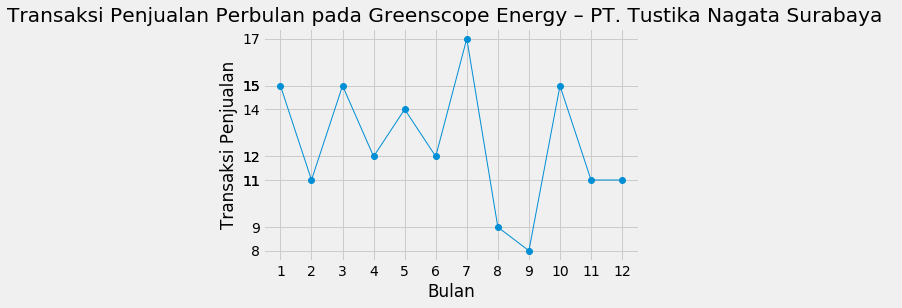

,Bulan,Jumlah Transaksi
1,1,15
2,2,11
3,3,15
4,4,12
5,5,14
6,6,12
7,7,17
8,8,9
9,9,8
10,10,15


In [53]:
#VISUALISASI DATA JUMLAH TRANSAKSI PADA SETIAP BULAN

c.execute('''select * from
(
select id_time, count(jumlah_pesanan) as jumlah_transaksi from sales group by id_time
)''')
jumlah = []
for row in c.fetchall():
    jumlah.append(row)
np_bulan_kontraktor = np.array(jumlah)

plt.plot([int (x[0]) for x in np_bulan_kontraktor [:,:]], [ int(x[1]) for x in np_bulan_kontraktor[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_bulan_kontraktor[:,:]], [ int(x[0]) for x in np_bulan_kontraktor[:,:]])
plt.yticks([ int(x[1]) for x in np_bulan_kontraktor[:,:]], [ int(x[1]) for x in np_bulan_kontraktor[:,:]])
plt.xlabel('Bulan')
plt.ylabel('Transaksi Penjualan')
plt.title("Transaksi Penjualan Perbulan pada Greenscope Energy – PT. Tustika Nagata Surabaya  ")
plt.show()

df = pd.DataFrame([ x for x in np_bulan_kontraktor[:,:]])
df.columns = ['Bulan', 'Jumlah Transaksi']
df.index = np.arange(1,len(df)+1)
df

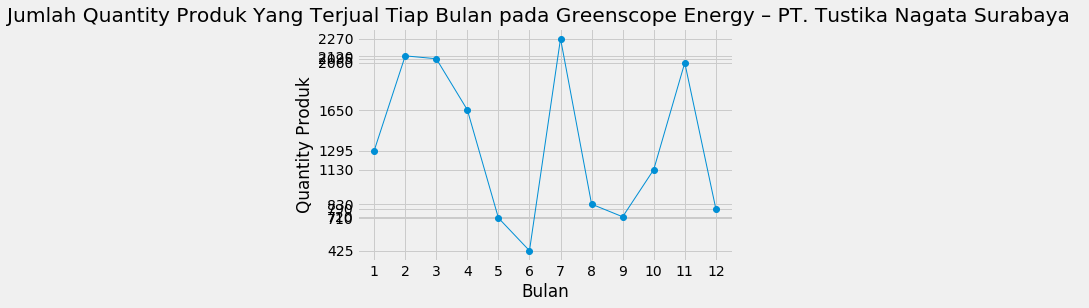

,Bulan,Quantity
1,1,1295
2,2,2120
3,3,2095
4,4,1650
5,5,710
6,6,425
7,7,2270
8,8,830
9,9,720
10,10,1130


In [54]:
#VISUALISASI DATA JUMLAH PRODUK YANG TERJUAL PADA SETIAP BULAN

c.execute('''select * from
(
select id_time, sum(jumlah_pesanan) as jumlah_produk_terjual from sales group by id_time
)''')
jumlah = []
for row in c.fetchall():
    jumlah.append(row)
np_bulan_kontraktor = np.array(jumlah)

plt.plot([int (x[0]) for x in np_bulan_kontraktor [:,:]], [ int(x[1]) for x in np_bulan_kontraktor[:,:]],'-o',linewidth=1.0)
plt.xticks([ int(x[0]) for x in np_bulan_kontraktor[:,:]], [ int(x[0]) for x in np_bulan_kontraktor[:,:]])

plt.yticks([ int(x[1]) for x in np_bulan_kontraktor[:,:]], [ int(x[1]) for x in np_bulan_kontraktor[:,:]])
plt.xlabel('Bulan')
plt.ylabel('Quantity Produk')
plt.title("Jumlah Quantity Produk Yang Terjual Tiap Bulan pada Greenscope Energy – PT. Tustika Nagata Surabaya  ")
plt.show()

df = pd.DataFrame([ x for x in np_bulan_kontraktor[:,:]])
df.columns = ['Bulan', 'Quantity']
df.index = np.arange(1,len(df)+1)
df

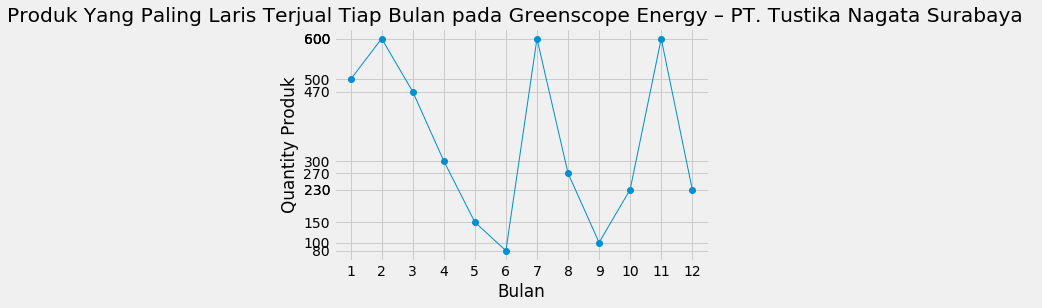

,Bulan,Quantity
1,1,500
2,2,600
3,3,470
4,4,300
5,5,150
6,6,80
7,7,600
8,8,270
9,9,100
10,10,230


In [55]:
#VISUALISASI DATA JUMLAH PRODUK YANG  PALING BANYAK TERJUAL PADA SETIAP BULAN
c.execute('''select * from
(
select id_time, max(jumlah_pesanan) as jumlah_produk_terjual from sales group by id_time
)''')
jumlah = []
for row in c.fetchall():
    jumlah.append(row)
np_bulan_kontraktor = np.array(jumlah)

plt.plot([int (x[0]) for x in np_bulan_kontraktor [:,:]], [ int(x[1]) for x in np_bulan_kontraktor[:,:]],'-o',linewidth=1.0)

plt.xticks([ int(x[0]) for x in np_bulan_kontraktor[:,:]], [ int(x[0]) for x in np_bulan_kontraktor[:,:]])
plt.yticks([ int(x[1]) for x in np_bulan_kontraktor[:,:]], [ int(x[1]) for x in np_bulan_kontraktor[:,:]])
plt.xlabel('Bulan')
plt.ylabel('Quantity Produk')
plt.title("Produk Yang Paling Laris Terjual Tiap Bulan pada Greenscope Energy – PT. Tustika Nagata Surabaya  ")
plt.show()

df = pd.DataFrame([ x for x in np_bulan_kontraktor[:,:]])
df.columns = ['Bulan', 'Quantity']
df.index = np.arange(1,len(df)+1)
df

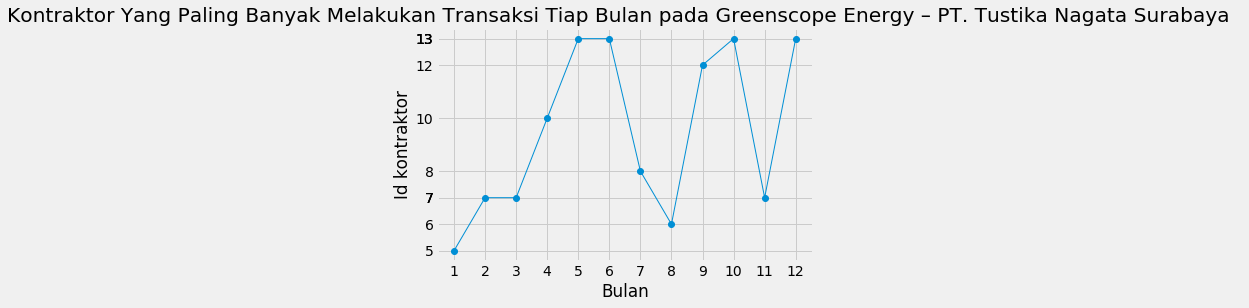

,Bulan,Id kontraktor
1,1,5
2,2,7
3,3,7
4,4,10
5,5,13
6,6,13
7,7,8
8,8,6
9,9,12
10,10,13


In [76]:
#VISUALISASI DATA KONTRAKTOR YANG PALING BANYAK MELAKUKAN TRANSAKSI PADA SETIAP BULAN
c.execute('''select * from
(
select id_time, max(kode_kontraktor) as kontraktor from sales group by id_time
)''')
jumlah = []
for row in c.fetchall():
    jumlah.append(row)
np_bulan_kontraktor = np.array(jumlah)

plt.plot([int (x[0]) for x in np_bulan_kontraktor [:,:]], [ int(x[1]) for x in np_bulan_kontraktor[:,:]],'-o',linewidth=1.0)

plt.xticks([ int(x[0]) for x in np_bulan_kontraktor[:,:]], [ int(x[0]) for x in np_bulan_kontraktor[:,:]])
plt.yticks([ int(x[1]) for x in np_bulan_kontraktor[:,:]], [ int(x[1]) for x in np_bulan_kontraktor[:,:]])
plt.xlabel('Bulan')
plt.ylabel('Id kontraktor')
plt.title("Kontraktor Yang Paling Banyak Melakukan Transaksi Tiap Bulan pada Greenscope Energy – PT. Tustika Nagata Surabaya  ")
plt.show()

df = pd.DataFrame([ x for x in np_bulan_kontraktor[:,:]])
df.columns = ['Bulan', 'Id kontraktor']
df.index = np.arange(1,len(df)+1)
df